### Q1) Tabulate the following attributes: mfr, and type of cereals

In [9]:
import pandas as pd

cereals_df = pd.read_csv('cereals.csv')

tab = pd.crosstab(index=cereals_df['mfr'], columns=cereals_df['type'])

print(tab)

type   C  H
mfr        
A      0  1
G     22  0
K     23  0
N      5  1
P      9  0
Q      7  1
R      8  0


### Q2) Display the 5 number summary for all nutritional attributes starting from calories to vitamins.

In [10]:
nutrients = cereals_df.columns[3:-1]
summary = cereals_df[nutrients].describe()
print(summary)

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000  
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039  
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  
mi

### Q3) For missing values find and replace with arithmetic mean of the attributes.

In [12]:
cereals_df.replace(-1, pd.NA, inplace=True)
cereals_df.fillna(cereals_df.mean(), inplace=True)

cereals_df

C:\Users\codes\AppData\Local\Temp\ipykernel_32412\977107729.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cereals_df.fillna(cereals_df.mean(), inplace=True)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


### Q4) Find and replace outliers with median.

In [14]:
def out(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    series[(series < lower_bound) | (series > upper_bound)] = series.median()
    return series

cereals_df[cereals_df.select_dtypes(include='number').columns] = cereals_df.select_dtypes(include='number').apply(out)

### Q5) Compare the 5 number summary before and after preprocessing

In [16]:
nutrients = cereals_df.columns[3:-1]

summary_before = cereals_df[nutrients].describe()
cereals_df.replace(-1, pd.NA, inplace=True)
cereals_df.fillna(cereals_df.mean(), inplace=True)
cereals_df[cereals_df.select_dtypes(include='number').columns] = cereals_df.select_dtypes(include='number').apply(out)
summary_after = cereals_df[nutrients].describe()

summary_before.columns = [col + '_before' for col in summary_before.columns]
summary_after.columns = [col + '_after' for col in summary_after.columns]
summary_comparison = pd.concat([summary_before, summary_after], axis=1)
print(summary_comparison)

       calories_before  protein_before  fat_before  sodium_before  \
count        77.000000       77.000000   77.000000      77.000000   
mean        107.272727        2.441558    1.012987     180.714286   
std           8.051865        0.895802    1.006473      60.075141   
min          90.000000        1.000000    0.000000      15.000000   
25%         100.000000        2.000000    0.000000     140.000000   
50%         110.000000        3.000000    1.000000     180.000000   
75%         110.000000        3.000000    2.000000     210.000000   
max         120.000000        4.000000    5.000000     320.000000   

       fiber_before  carbo_before  sugars_before  potass_before  \
count     77.000000     77.000000      77.000000      77.000000   
mean       1.801299     14.802632       7.026316      85.939394   
std        1.510707      3.881534       4.349754      47.763205   
min        0.000000      5.000000       0.000000      15.000000   
25%        1.000000     12.000000       3.0

C:\Users\codes\AppData\Local\Temp\ipykernel_32412\1407682371.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cereals_df.fillna(cereals_df.mean(), inplace=True)


### Q6) Draw side-by-side box plots of Calories of Hot Vs cold cereals.

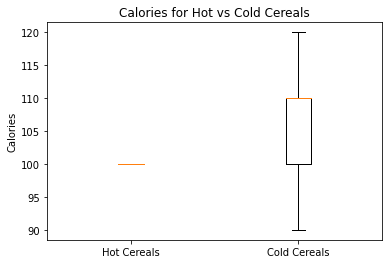

In [41]:
import matplotlib.pyplot as plt
hot_cals = cereals_df[cereals_df['type'] == 'H']['calories']
cold_cals = cereals_df[cereals_df['type'] == 'C']['calories']

plt.boxplot([hot_cals, cold_cals], labels=['Hot Cereals', 'Cold Cereals'])
plt.title('Calories for Hot vs Cold Cereals')
plt.ylabel('Calories')
plt.show()

### Q7) Are the attributes calories and consumer rating correlated?

In [21]:
correlation = cereals_df['calories'].corr(cereals_df['rating'])
print('Correlation between calories and consumer rating:', correlation)

Correlation between calories and consumer rating: -0.5697325224975478


### Q8) Are the attributes mfr and consumer rating correlated?

In [39]:
c = cereals_df[['mfr', 'rating']].corr()
print(c)

        rating
rating     1.0


### Q9) Which is the best Vs worst cereal in terms of user rating?

In [25]:
best_cereal = cereals_df.loc[cereals_df['rating'].idxmax(), 'name']
worst_cereal = cereals_df.loc[cereals_df['rating'].idxmin(), 'name']

print('Best cereal:', best_cereal)
print('Worst cereal:', worst_cereal)

Best cereal: Shredded Wheat 'n'Bran
Worst cereal: Cap'n'Crunch


### Q10) Which is the best Vs worst cereal in terms of calories?

In [26]:
most_caloric_cereal = cereals_df.loc[cereals_df['calories'].idxmax(), 'name']
least_caloric_cereal = cereals_df.loc[cereals_df['calories'].idxmin(), 'name']

print('Most caloric cereal:', most_caloric_cereal)
print('Least caloric cereal:', least_caloric_cereal)

Most caloric cereal: 100% Natural Bran
Least caloric cereal: Bran Chex


### Q11) Rate the top 5 cereals in terms of user rating?

In [28]:
tr = cereals_df.sort_values(by='rating', ascending=False).head(5)
print('Top rated cereals:\n', tr['name'], sep="")

Top rated cereals:
64       Shredded Wheat 'n'Bran
65    Shredded Wheat spoon size
0                     100% Bran
63               Shredded Wheat
20       Cream of Wheat (Quick)
Name: name, dtype: object


### Q12) Identify the cereal with the highest sodium.

In [37]:
hs = cereals_df.loc[cereals_df['sodium'].idxmax(), 'name']
print('Cereal with the highest sodium:', hs)

Cereal with the highest sodium: Cheerios


### Q13) Identify the cereal with the lowest carbohydrate.

In [30]:
lc = cereals_df.loc[cereals_df['carbo'].idxmin(), 'name']
print('Cereal with the lowest carbohydrate:', lc)

Cereal with the lowest carbohydrate: 100% Bran


### Q14) Are the variable shelf and sugar correlated?

In [31]:
correlation = cereals_df['shelf'].corr(cereals_df['sugars'])
print('Correlation between shelf and sugar:', correlation)

Correlation between shelf and sugar: 0.06741094488984592


### Q15) Identify the manufacturer of the cereal with the highest sugar content.

In [32]:
m = cereals_df.loc[cereals_df['sugars'].idxmax(), 'mfr']
print('Manufacturer of the cereal with the highest sugar content:', m)

Manufacturer of the cereal with the highest sugar content: P


### Q16) Replace missing values with mean

In [36]:
import numpy as np
cereals_df.replace(-1, np.nan, inplace=True)
mean_values = cereals_df.mean()
cereals_df.fillna(mean_values, inplace=True)
print(cereals_df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C       110        4    1     130    2.0   
1           100% Natural Bran   Q    C       120        3    5     180    2.0   
2                    All-Bran   K    C       110        4    1     260    2.0   
3   All-Bran with Extra Fiber   K    C       110        4    0     140    2.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars      pota

C:\Users\codes\AppData\Local\Temp\ipykernel_32412\3739426369.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = cereals_df.mean()


### Q17) Find outliers using 1.5 * IQR

In [34]:
q1 = cereals_df.quantile(0.25)
q3 = cereals_df.quantile(0.75)
iqr = q3 - q1
lower_limit = (q1 - 1.5 * iqr)
upper_limit = (q3 + 1.5 * iqr)
outliers = ((cereals_df < lower_limit) | (cereals_df > upper_limit)).any(axis=1)
print(cereals_df[outliers])

            name mfr type  calories  protein  fat  sodium  fiber  carbo  \
30  Golden Crisp   P    C       100        2    0      45    0.0   11.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  
30    15.0    40.0        25      1     1.0  0.88  35.252444  


C:\Users\codes\AppData\Local\Temp\ipykernel_32412\3035148300.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((cereals_df < lower_limit) | (cereals_df > upper_limit)).any(axis=1)
